In [1]:
import random

from collections import Counter, namedtuple
from timeit import timeit

import statistics as stats
import matplotlib.pyplot as plt
import numpy as np

import wordbase

In [2]:
wb = wordbase.WordBase.from_pickle()

In [3]:
counts = [p.word_lengths for p in wb.get_all_pangrams()]

In [4]:
fours = []
fives = []
sixes = []
totals = []
for count in counts:
    total = 0
    four = 0
    five = 0
    six = 0
    for y in count:
        total += count[y]
        if y == 4:
            four = count[y]
        if y == 5:
            five = count[y]
        if y == 6:
            six = count[y]
    fours.append(four)
    fives.append(five)
    sixes.append(six)
    totals.append(total)

In [5]:
#plot distribution of all lists
avgfours = [x/y for x,y in zip(fours, totals)]
avgfives = [x/y for x,y in zip(fives, totals)]
avgsixes = [x/y for x,y in zip(sixes, totals)]

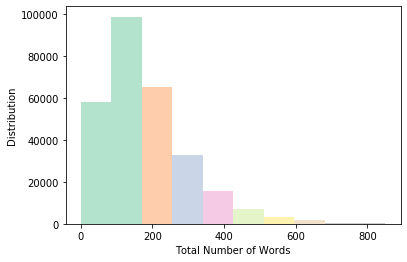

In [6]:
cm = plt.cm.get_cmap("Pastel2")
n, bins, patches = plt.hist(totals,color="thistle")
ax = plt.gca()
ax.set_xlabel("Total Number of Words")
ax.set_ylabel("Distribution")
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

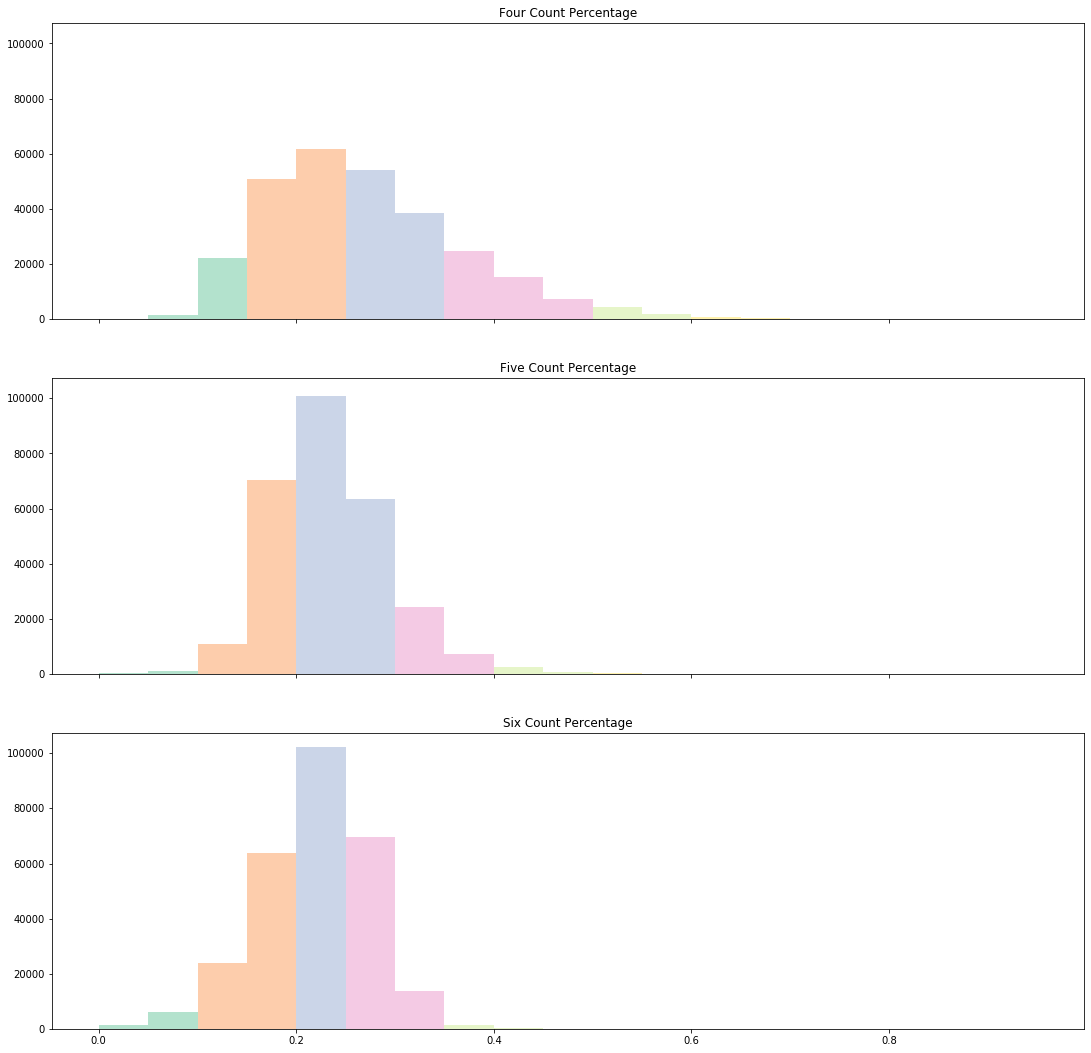

In [11]:
binwidth = 0.05

cm = plt.cm.get_cmap("Pastel2")
fig,(axs1,axs2,axs3) = plt.subplots(3, sharex=True,sharey=True)

n, bins, patches = axs1.hist(avgfours,bins=np.arange(min(avgfours), max(avgfours) + binwidth, binwidth))
axs1.set_title('Four Count Percentage')

bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

n, bins, patches = axs2.hist(avgfives,bins=np.arange(min(avgfives), max(avgfives) + binwidth, binwidth))
axs2.set_title('Five Count Percentage')

bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

n, bins, patches = axs3.hist(avgsixes,bins=np.arange(min(avgsixes), max(avgsixes) + binwidth, binwidth))
axs3.set_title('Six Count Percentage')

bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
    
fig = plt.gcf()
fig.set_size_inches(18.5, 18.5)
fig.patch.set_facecolor("white")
fig.savefig('percentages.png', dpi=100)

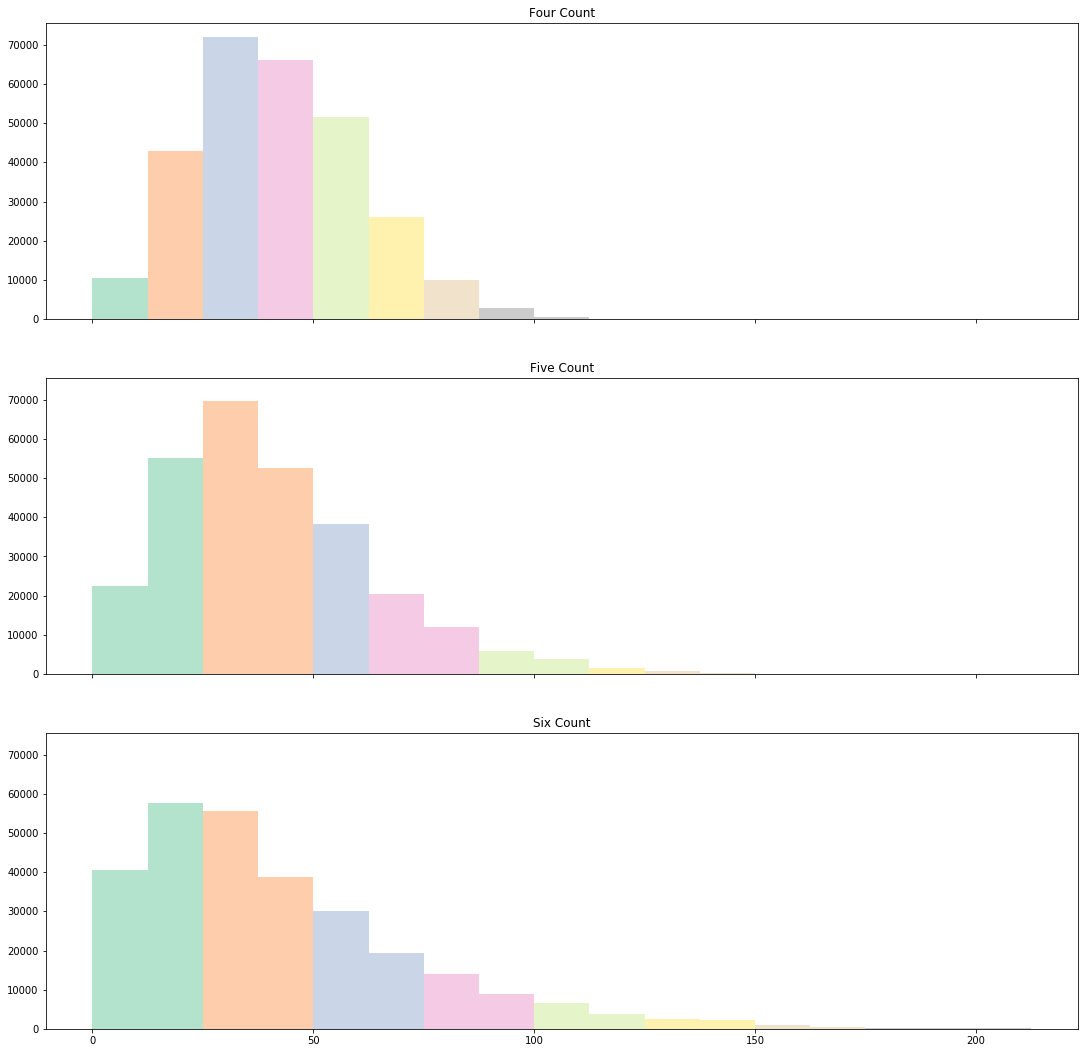

In [12]:
binwidth = 12.5

cm = plt.cm.get_cmap("Pastel2")
fig,(axs1,axs2,axs3) = plt.subplots(3, sharex=True,sharey=True)

n, bins, patches = axs1.hist(fours,bins=np.arange(min(fours), max(fours) + binwidth, binwidth))
axs1.set_title('Four Count')

bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

n, bins, patches = axs2.hist(fives,bins=np.arange(min(fives), max(fives) + binwidth, binwidth))
axs2.set_title('Five Count')

bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

n, bins, patches = axs3.hist(sixes,bins=np.arange(min(sixes), max(sixes) + binwidth, binwidth))
axs3.set_title('Six Count')

bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
    
fig = plt.gcf()
fig.set_size_inches(18.5, 18.5)
fig.patch.set_facecolor("white")
fig.savefig('counts.png', dpi=100)